In [420]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [421]:
#Load the Data 
movie=pd.read_csv("C:/Users/kfeng3/Desktop/cleaneddatafinal2.csv")
movie.head()

,release_date,title,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,9/4/1916,Intolerance,1,0,0,1,4.163937e+05,9.057936e+06,197,1,7.4,60,8
1,1/10/1927,Metropolis,0,1,1,0,9.104546e+07,6.393648e+05,153,0,8.0,657,8
2,1/30/1929,Pandora's Box,0,0,0,0,1.500000e+07,2.036248e+07,109,0,7.6,45,8
3,2/8/1929,The Broadway Melody,1,0,0,1,3.790000e+05,4.358000e+06,100,1,5.0,19,8
4,11/15/1930,Hell's Angels,1,0,0,1,3.859150e+06,7.816000e+06,127,0,6.1,19,10


In [422]:
#K-Means Clustering, Normalizing the Data
movie["genres"]=((movie["genres"]-movie["genres"].min())/(movie["genres"].max()-movie["genres"].min()))*1
movie["adjbudget"]=((movie["adjbudget"]-movie["adjbudget"].min())/(movie["adjbudget"].max()-movie["adjbudget"].min()))*1
movie["adjrevenue"]=((movie["adjrevenue"]-movie["adjrevenue"].min())/(movie["adjrevenue"].max()-movie["adjrevenue"].min()))*1
movie["runtime"]=((movie["runtime"]-movie["runtime"].min())/(movie["runtime"].max()-movie["runtime"].min()))*1
movie["vote_average"]=((movie["vote_average"]-movie["vote_average"].min())/(movie["vote_average"].max()-movie["vote_average"].min()))*1
movie["vote_count"]=((movie["vote_count"]-movie["vote_count"].min())/(movie["vote_count"].max()-movie["vote_count"].min()))*1

In [423]:
#Print out the Data and Check Standardized Data
movie.head()

,release_date,title,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,9/4/1916,Intolerance,1,0,0,1,0.001035,0.003258,0.564815,1,0.711111,0.004291,0.466667
1,1/10/1927,Metropolis,0,1,1,0,0.232143,0.000227,0.429012,0,0.777778,0.047706,0.466667
2,1/30/1929,Pandora's Box,0,0,0,0,0.038224,0.007329,0.293210,0,0.733333,0.003200,0.466667
3,2/8/1929,The Broadway Melody,1,0,0,1,0.000939,0.001566,0.265432,1,0.444444,0.001309,0.466667
4,11/15/1930,Hell's Angels,1,0,0,1,0.009814,0.002811,0.348765,0,0.566667,0.001309,0.600000


In [476]:
#Remove Irrelevant Text Variables Before K-Means (Title, Release Data)
movie1=movie.drop(columns=["release_date", "title"])
movie1.head()

,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,1,0,0,1,0.001035,0.003258,0.564815,1,0.711111,0.004291,0.466667
1,0,1,1,0,0.232143,0.000227,0.429012,0,0.777778,0.047706,0.466667
2,0,0,0,0,0.038224,0.007329,0.293210,0,0.733333,0.003200,0.466667
3,1,0,0,1,0.000939,0.001566,0.265432,1,0.444444,0.001309,0.466667
4,1,0,0,1,0.009814,0.002811,0.348765,0,0.566667,0.001309,0.600000


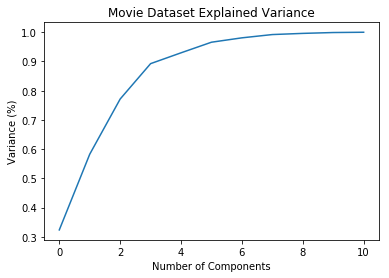

In [533]:
#Explained Variance 
pca = PCA().fit(movie1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Movie Dataset Explained Variance')
plt.show()

In [538]:
#PCA Dimension Reduction 
pca = PCA(n_components=2)
pcomponents = pca.fit_transform(movie1)
pcamovie1 = pd.DataFrame(data = pcomponents, columns = ["PC1", "PC2"])

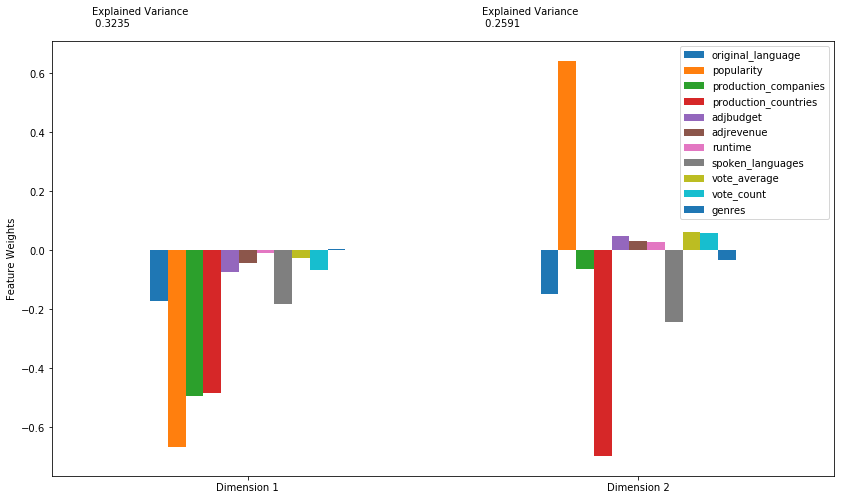

In [539]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(movie1, pca)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


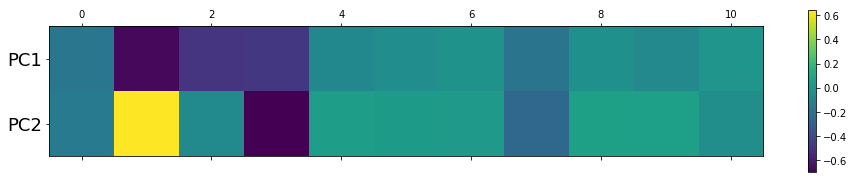

In [480]:
#Check out which variables are most essential in the new Principal components
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["PC1","PC2"],fontsize=18)
plt.colorbar()
plt.tight_layout()
plt.show()

In [525]:
print (pd.DataFrame(pca.components_,columns=movie1.columns,index = ["PC1","PC2"]))

     original_language  popularity  production_companies  \
PC1          -0.171974   -0.668276             -0.494041   
PC2          -0.149543    0.642570             -0.064463   

     production_countries  adjbudget  adjrevenue   runtime  spoken_languages  \
PC1             -0.483806  -0.072865   -0.043263 -0.010216         -0.182173   
PC2             -0.698764   0.049068    0.029812  0.028031         -0.244591   

     vote_average  vote_count    genres  
PC1     -0.026033   -0.067323  0.002281  
PC2      0.061391    0.058623 -0.034667  


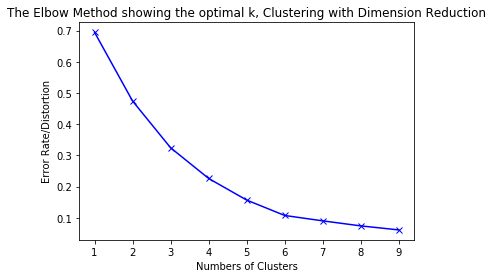

In [541]:
#Plot the Elbow Curve and find the most optimal k
plt.plot(K, distortions, "bx-")
plt.xlabel("Numbers of Clusters")
plt.ylabel("Error Rate/Distortion")
plt.title('The Elbow Method showing the optimal k, Clustering with Dimension Reduction')
plt.show()   #K=2, 3, 4

In [506]:
#K=2
km1=KMeans(n_clusters=2)
km1.fit(pcamovie1)
y_means1 = km1.fit_predict(pcamovie1)

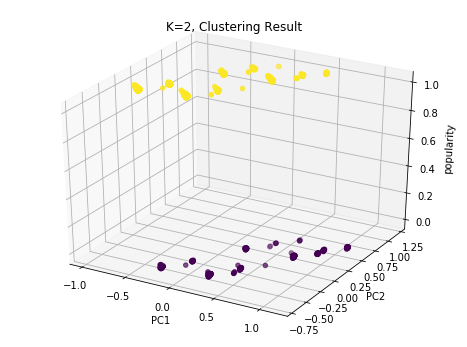

In [542]:
#3D Visualization with K=3
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection="3d") 
x_ax = np.array(pcamovie1.iloc[:, 0]).flatten() 
y_ax = np.array(pcamovie1.iloc[:, 1]).flatten() 
z_ax = np.array(movie.iloc[:, 3]).flatten()     
ax.scatter(x_ax, y_ax, z_ax, marker='o', c=y_means1) 
ax.set_xlabel("PC1") 
ax.set_ylabel("PC2") 
ax.set_zlabel("popularity") 
ax.set_title("K=2, Clustering Result")
plt.show() 

In [508]:
metrics.silhouette_score(pcamovie1, y_means3, metric="euclidean", sample_size=None, random_state=None)

0.7472329806223472

In [509]:
#K=3
km2=KMeans(n_clusters=3)
km2.fit(pcamovie1)
y_means2 = km2.fit_predict(pcamovie1)

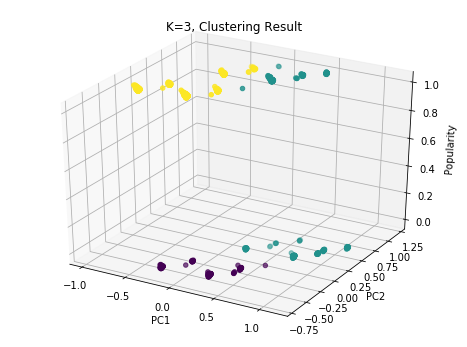

In [543]:
#3D Visualization with K=4
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection="3d") 
x_ax = np.array(pcamovie1.iloc[:, 0]).flatten() 
y_ax = np.array(pcamovie1.iloc[:, 1]).flatten() 
z_ax = np.array(movie.iloc[:, 3]).flatten()     
ax.scatter(x_ax, y_ax, z_ax, marker='o', c=y_means2) 
ax.set_xlabel("PC1") 
ax.set_ylabel("PC2") 
ax.set_zlabel("Popularity") 
ax.set_title("K=3, Clustering Result")
plt.show() 

In [511]:
metrics.silhouette_score(pcamovie1, y_means2, metric="euclidean", sample_size=None, random_state=None)

0.6150127420038455

In [513]:
#K=4
km3=KMeans(n_clusters=4)
km3.fit(pcamovie1)
y_means3 = km3.fit_predict(pcamovie1)

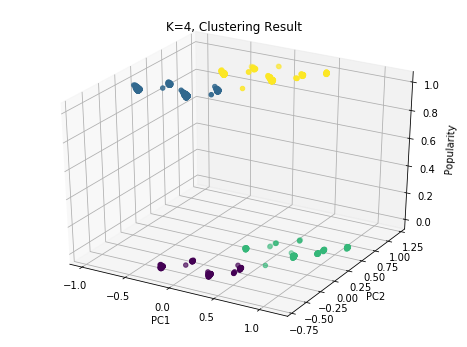

In [544]:
#3D Visualization with K=5
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection="3d") 
x_ax = np.array(pcamovie1.iloc[:, 0]).flatten() 
y_ax = np.array(pcamovie1.iloc[:, 1]).flatten() 
z_ax = np.array(movie.iloc[:, 3]).flatten()     
ax.scatter(x_ax, y_ax, z_ax, marker='o', c=y_means3) 
ax.set_xlabel("PC1") 
ax.set_ylabel("PC2") 
ax.set_zlabel("Popularity") 
ax.set_title("K=4, Clustering Result")
plt.show() 

In [517]:
metrics.silhouette_score(pcamovie1, y_means1, metric="euclidean", sample_size=None, random_state=None)

0.5090510706272152

,PC1,PC2
1200,0.051352,0.816001
1643,-0.188102,-0.675850
322,-0.862830,-0.012498
805,-0.376367,0.059419
2229,-0.386777,0.697900
